# Gradient boosted decision tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import joblib

#### Importing training and testing sets

In [2]:
X_train = joblib.load('./datasets/X_train.joblib')
X_test = joblib.load('./datasets/X_test.joblib')
y_train = joblib.load('./datasets/y_train.joblib')
y_test = joblib.load('./datasets/y_test.joblib')

In [3]:
X_train

,BNUM_OUT,BNUM_IN,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,Segment 1,Segment 2,Segment 3,Segment 5
0,0.548670,0.618258,-0.791595,0.0,-0.737565,1.803933,-1.056235,-0.555267,1.516427,-0.429513,-0.663266
1,0.548670,0.713341,-0.349134,0.0,-0.117997,1.803933,0.692729,-0.555267,1.516427,-0.429513,-0.663266
2,1.817986,2.044500,2.305630,0.0,1.947230,-0.637988,1.310010,-0.555267,1.516427,-0.429513,-0.663266
3,1.471809,0.428092,-0.791595,0.0,-0.737565,1.803933,-1.159116,-0.555267,1.516427,-0.429513,-0.663266
4,2.164163,2.044500,-0.349134,0.0,0.501571,1.803933,1.447184,-0.555267,1.516427,-0.429513,-0.663266
...,...,...,...,...,...,...,...,...,...,...,...
3674,0.317886,0.998589,0.535788,0.0,0.914616,-0.237673,-1.124822,-0.555267,1.516427,-0.429513,-0.663266
3675,-0.720645,-0.617819,-0.349134,0.0,-0.737565,-0.718051,-0.473247,-0.555267,-0.659445,-0.429513,1.507691
3676,-0.836038,0.142844,-0.349134,0.0,-0.737565,-0.718051,-1.021942,-0.555267,-0.659445,-0.429513,1.507691
3677,2.164163,2.044500,-0.791595,0.0,-0.737565,1.803933,-0.679008,-0.555267,1.516427,-0.429513,-0.663266


In [4]:
X_train.isna().sum().sort_values(ascending = False)

BNUM_OUT                0
BNUM_IN                 0
REV_OUT                 0
USAGE_OUT_INT_DUR       0
USAGE_OUT_OFFNET_DUR    0
USAGE_OUT_ONNET_DUR     0
LNE_TENURE              0
Segment 1               0
Segment 2               0
Segment 3               0
Segment 5               0
dtype: int64

###### Preview of training data

In [5]:
X_train.describe()

,BNUM_OUT,BNUM_IN,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,Segment 1,Segment 2,Segment 3,Segment 5
count,3.679000e+03,3.679000e+03,3.679000e+03,3679.0,3.679000e+03,3.679000e+03,3.679000e+03,3.679000e+03,3.679000e+03,3.679000e+03,3.679000e+03
mean,6.083745e-17,3.862695e-17,1.762355e-17,0.0,4.248964e-17,-3.862695e-17,1.245719e-16,-5.794042e-17,3.379858e-17,4.924936e-17,9.463603e-17
std,1.000136e+00,1.000136e+00,1.000136e+00,0.0,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00
min,-9.514300e-01,-1.093233e+00,-7.915945e-01,0.0,-7.375648e-01,-7.180514e-01,-1.364876e+00,-5.552670e-01,-6.594448e-01,-4.295133e-01,-6.632660e-01
25%,-8.360376e-01,-8.079842e-01,-7.915945e-01,0.0,-7.375648e-01,-7.180514e-01,-9.533552e-01,-5.552670e-01,-6.594448e-01,-4.295133e-01,-6.632660e-01
50%,-3.744683e-01,-3.325701e-01,-3.491338e-01,0.0,-5.310422e-01,-5.979569e-01,-2.331934e-01,-5.552670e-01,-6.594448e-01,-4.295133e-01,-6.632660e-01
75%,5.486703e-01,6.182579e-01,5.357875e-01,0.0,5.015710e-01,5.629564e-01,9.670763e-01,-5.552670e-01,1.516427e+00,-4.295133e-01,1.507691e+00
max,2.164163e+00,2.044500e+00,2.305630e+00,0.0,1.947230e+00,1.803933e+00,1.481478e+00,1.800935e+00,1.516427e+00,2.328217e+00,1.507691e+00


##### Summary statistics of the training variables

In [6]:
print(round(X_train.describe()),2)

       BNUM_OUT  BNUM_IN  REV_OUT  USAGE_OUT_INT_DUR  USAGE_OUT_OFFNET_DUR  \
count    3679.0   3679.0   3679.0             3679.0                3679.0   
mean        0.0      0.0      0.0                0.0                   0.0   
std         1.0      1.0      1.0                0.0                   1.0   
min        -1.0     -1.0     -1.0                0.0                  -1.0   
25%        -1.0     -1.0     -1.0                0.0                  -1.0   
50%        -0.0     -0.0     -0.0                0.0                  -1.0   
75%         1.0      1.0      1.0                0.0                   1.0   
max         2.0      2.0      2.0                0.0                   2.0   

       USAGE_OUT_ONNET_DUR  LNE_TENURE  Segment 1  Segment 2  Segment 3  \
count               3679.0      3679.0     3679.0     3679.0     3679.0   
mean                  -0.0         0.0       -0.0        0.0        0.0   
std                    1.0         1.0        1.0        1.0        1.0 

In [7]:
y_train.value_counts()/len(X_train) * 100
# imbalanced data set

CHURN
0    76.35227
1    23.64773
Name: count, dtype: float64

#### Creating and fitting Gradient Boosting Classifier model

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=0)

gb_model = gb_model.fit(X_train, y_train)

##### Plotting 42nd tree in the ensemble

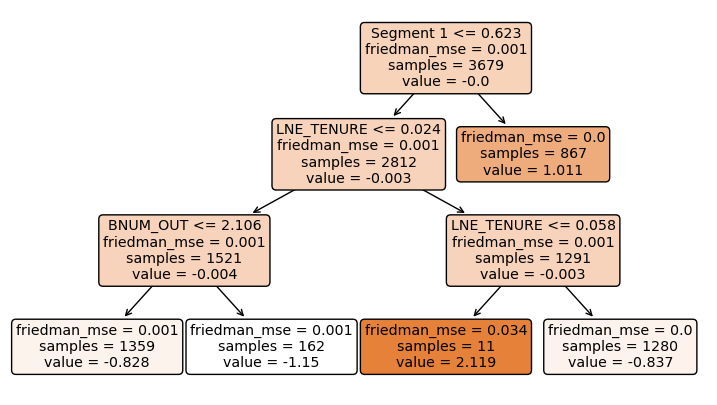

In [9]:
from sklearn.tree import plot_tree

sub_tree = gb_model.estimators_[42, 0]

plt.figure(figsize=(9, 5))
plot_tree(sub_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

##### Plotting 43rd tree in the ensemble

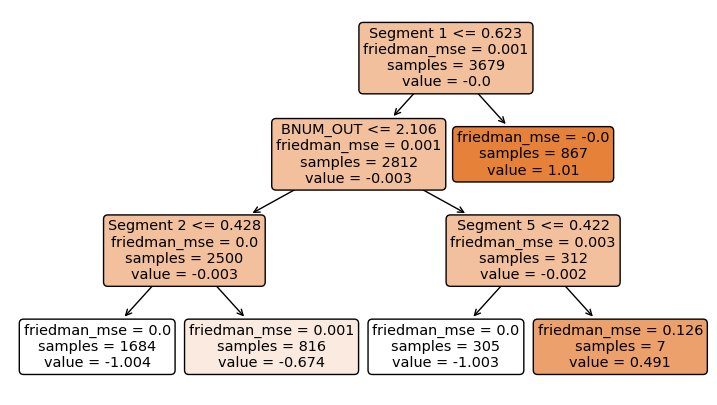

In [10]:
sub_tree = gb_model.estimators_[43, 0]
plt.figure(figsize=(9, 5))
plot_tree(sub_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

##### Creating CHURN event predictions with created classifier

In [11]:
y_pred = gb_model.predict(X_test)
y_pred[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

###### Checking accuracy of the model

In [12]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred) * 100

print('Model accuracy score: {0:0.4f}'.format(acc_score))

Model accuracy score: 99.6739


###### Confusion matrix

<Figure size 200x200 with 0 Axes>

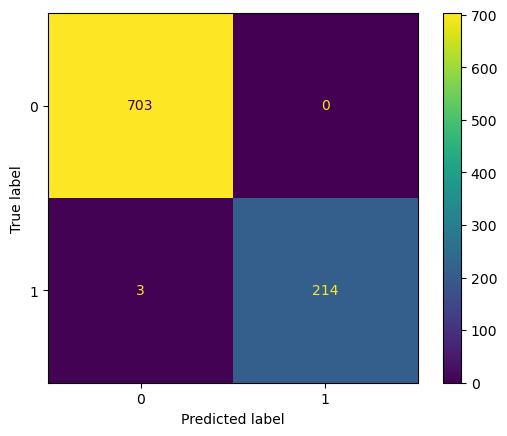

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

plt.figure(figsize=(2,2))
cm_display.plot()

##### F1 score (measuring harmonic mean between Precision and Recall)

In [14]:
from sklearn.metrics import f1_score as f1
f1(y_test, y_pred) *100

99.30394431554525

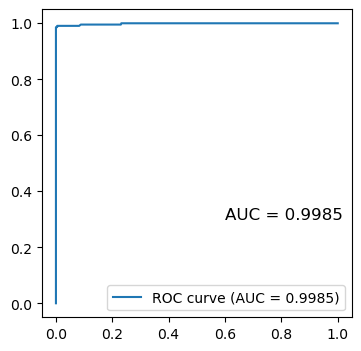

In [15]:
plt.figure(figsize=(4,4))

from sklearn import metrics

y_scores = gb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)

roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")

plt.legend(loc='lower right')
plt.text(0.6, 0.3, f'AUC = {roc_auc:.4f}', fontsize=12)
plt.show()

##### Feature importance 

In [16]:
feature_importance = pd.DataFrame(gb_model.feature_importances_,index = X_train.columns, columns = ['Feature score'])

feature_importance['Feature score'] = feature_importance['Feature score'].apply(lambda x: f'{x:.8f}')

feature_importance.sort_values(by = 'Feature score', ascending = False, inplace = True)
feature_importance

,Feature score
Segment 1,0.99837088
Segment 5,0.00123437
LNE_TENURE,0.00029961
REV_OUT,0.00002768
BNUM_OUT,0.00002343
BNUM_IN,0.00001879
USAGE_OUT_ONNET_DUR,0.00001338
Segment 2,0.00001187
USAGE_OUT_INT_DUR,0.00000000
USAGE_OUT_OFFNET_DUR,0.00000000
